Importamos Librerias

In [32]:
# Importamos las librerías

%matplotlib inline

from matplotlib import pyplot as plt
import seaborn as sns
import re
import numpy as np
import pandas as pd

from sklearn import linear_model
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

Importo Data Set

In [31]:
data = pd.read_csv("../desafio2/datafinal.csv", sep=",")

Miro el tipo de columnas, y los primeros elementos

In [33]:
print (data.dtypes)
data.head(10)

property_type             object
place_name                object
state_name                object
surface_total_in_m2      float64
surface_covered_in_m2    float64
price_usd_per_m2         float64
expenses                  object
cochera                    int64
pileta                     int64
parrilla                   int64
gimnasio                   int64
dtype: object


,property_type,place_name,state_name,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,expenses,cochera,pileta,parrilla,gimnasio
0,PH,Mataderos,Capital Federal,55.0,40.0,1127.272727,No Informado,0,0,0,0
1,apartment,Mataderos,Capital Federal,55.0,55.0,1309.090909,No Informado,0,0,0,0
2,apartment,Centro,Buenos Aires Costa Atlántica,35.0,35.0,1828.571429,No Informado,0,0,0,0
3,PH,Munro,Bs.As. G.B.A. Zona Norte,106.0,78.0,1226.415094,No Informado,0,0,0,0
4,apartment,Belgrano,Capital Federal,45.0,40.0,3066.666667,No Informado,0,0,0,0
5,apartment,Belgrano,Capital Federal,65.0,60.0,3000.000000,No Informado,0,0,0,0
6,house,Córdoba,Córdoba,1514.0,NaN,46.235139,No Informado,0,0,0,0
7,apartment,Martínez,Bs.As. G.B.A. Zona Norte,39.0,36.0,2948.717949,No Informado,0,0,0,0
8,apartment,Palermo Soho,Capital Federal,50.0,30.0,2234.000000,No Informado,0,1,0,1
9,apartment,Palermo Soho,Capital Federal,42.0,31.0,3521.428571,No Informado,0,1,0,1


Convertimos las variables float en int

In [35]:
data.price_usd_per_m2 = data.price_usd_per_m2.astype(int)

In [36]:
data.surface_total_in_m2 = data.surface_total_in_m2.astype(int)

Corrijo Columna surface_covered_in_m2

In [37]:
mask = (data['surface_covered_in_m2'].isnull()) & (data['surface_total_in_m2'].notnull())
data.loc[mask,'surface_covered_in_m2'] = data.loc[mask,'surface_total_in_m2']

data.surface_covered_in_m2 = data.surface_covered_in_m2.astype(int)

Cuadro de calor para ver la relacion entre variables

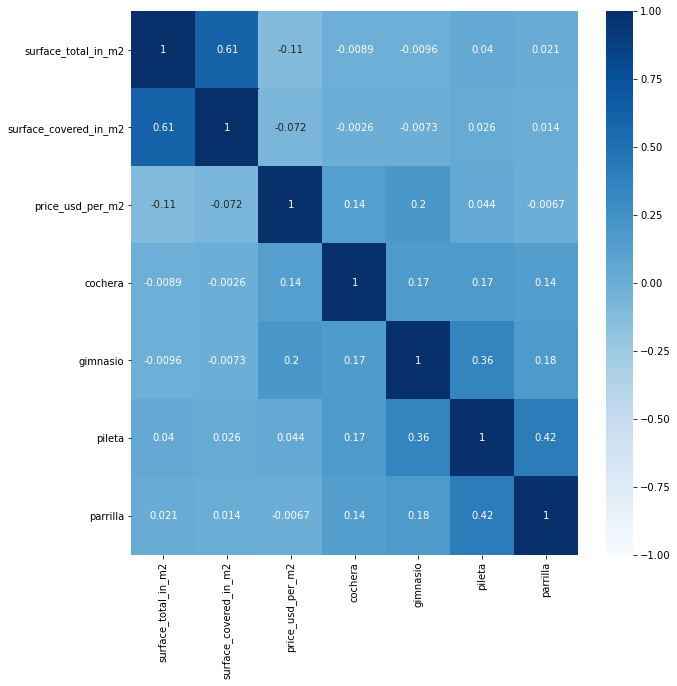

In [81]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.loc[:,['property_type', 'state_name', 'place_name',
       'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2',
       'cochera', 'gimnasio', 'pileta', 'parrilla']].corr(), annot=True, vmin=-1, cmap='Blues');

Miro impacto de variables cochera, pileta, parrilla y gimnasio

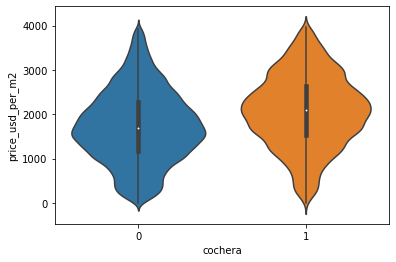

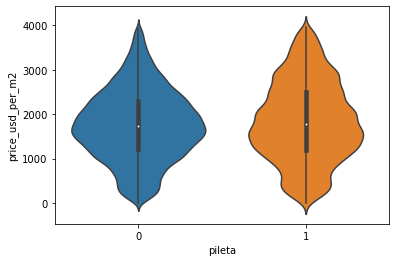

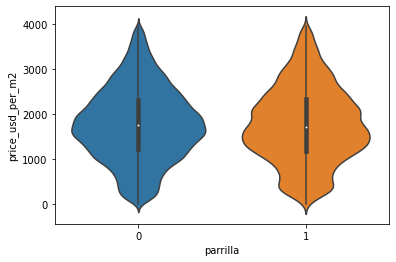

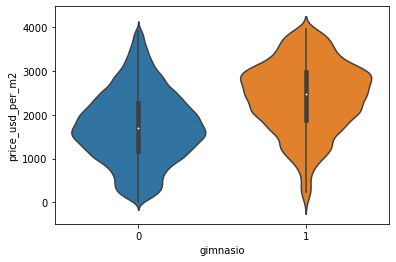

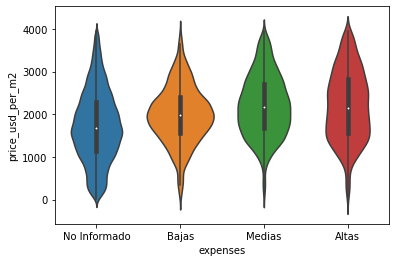

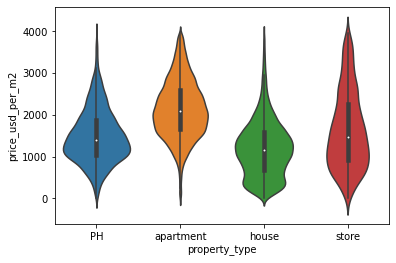

In [39]:
categories = ['cochera', 'pileta', 'parrilla','gimnasio','expenses','property_type']

for category in categories:
    sns.violinplot(x=category, y='price_usd_per_m2', data=data)
    plt.show()

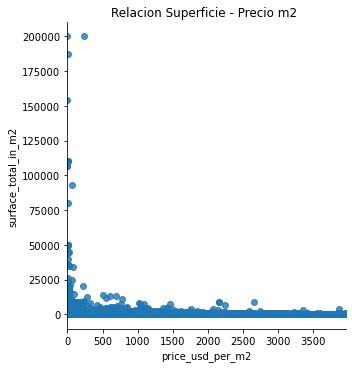

In [40]:
sns.lmplot(x="price_usd_per_m2", y="surface_total_in_m2", data=data)
plt.title("Relacion Superficie - Precio m2 ")
plt.show()


Dropeo outlier

In [41]:
datafinal = data.drop(index=(data.loc[data['place_name'] == 'coordenadas 34.255511'].index), axis = 0)

Borro barrios donde haya menos de 250 propiedades en la provincia

In [42]:
data.state_name.value_counts()

Capital Federal                 24896
Bs.As. G.B.A. Zona Norte        22074
Bs.As. G.B.A. Zona Sur          10253
Buenos Aires Costa Atlántica     7998
Bs.As. G.B.A. Zona Oeste         6430
Córdoba                          5486
Santa Fe                         4241
Buenos Aires Interior            1504
Corrientes                        441
Mendoza                           353
Río Negro                         273
Neuquén                           264
Misiones                          211
Tucumán                           176
San Luis                          160
Chubut                            147
Entre Ríos                         97
Salta                              58
Formosa                            29
Chaco                              29
Tierra Del Fuego                   28
Catamarca                          17
Santa Cruz                         13
La Pampa                           12
Jujuy                               5
Santiago Del Estero                 3
La Rioja    

In [43]:
listaprov = ['Corrientes','Mendoza','Río Negro','Neuquén','Misiones','Tucumán','San Luis','Chubut','Entre Ríos','Salta','Chaco','Formosa','Tierra Del Fuego','Catamarca','Santa Cruz','Catamarca','Santa Cruz','La Pampa','Jujuy','Santiago Del Estero','La Rioja','San Juan']
mask = (datafinal['state_name'].isin(listaprov))
datafinal.loc[mask,'place_name'] = 'Resto'

Dropeo variables sin relacion con el target

In [44]:
lista_drop = ['surface_covered_in_m2','parrilla']

datafinal = datafinal.drop(lista_drop,axis=1)

Genero Dummies

In [45]:
lista_dummies= ['state_name', 'place_name','property_type','expenses']
dummies=pd.get_dummies(datafinal[lista_dummies],drop_first= True)

In [46]:
columns_drop = ['property_type','place_name','state_name','expenses']

datafinal = pd.concat([datafinal.drop(columns_drop, axis=1), dummies], axis=1)

In [47]:
datafinal.head(5)

,surface_total_in_m2,price_usd_per_m2,cochera,pileta,gimnasio,state_name_Bs.As. G.B.A. Zona Oeste,state_name_Bs.As. G.B.A. Zona Sur,state_name_Buenos Aires Costa Atlántica,state_name_Buenos Aires Interior,state_name_Capital Federal,...,place_name_Wilde,place_name_William Morris,place_name_Zelaya,place_name_Zárate,property_type_apartment,property_type_house,property_type_store,expenses_Bajas,expenses_Medias,expenses_No Informado
0,55,1127,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,55,1309,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,35,1828,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3,106,1226,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,45,3066,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1


In [88]:
print(datafinal.columns)

Index(['surface_total_in_m2', 'price_usd_per_m2', 'cochera', 'pileta',
       'gimnasio', 'state_name_Bs.As. G.B.A. Zona Oeste',
       'state_name_Bs.As. G.B.A. Zona Sur',
       'state_name_Buenos Aires Costa Atlántica',
       'state_name_Buenos Aires Interior', 'state_name_Capital Federal',
       ...
       'place_name_William Morris', 'place_name_Zelaya', 'place_name_Zárate',
       'property_type_apartment', 'property_type_house', 'property_type_store',
       'expenses_Bajas', 'expenses_Medias', 'expenses_No Informado',
       'surface_total_in_m2^2'],
      dtype='object', length=831)


In [48]:
datafinal['surface_total_in_m2^2'] = datafinal['surface_total_in_m2']**2

In [90]:
print(datafinal.columns)

Index(['surface_total_in_m2', 'price_usd_per_m2', 'cochera', 'pileta',
       'gimnasio', 'state_name_Bs.As. G.B.A. Zona Oeste',
       'state_name_Bs.As. G.B.A. Zona Sur',
       'state_name_Buenos Aires Costa Atlántica',
       'state_name_Buenos Aires Interior', 'state_name_Capital Federal',
       ...
       'place_name_William Morris', 'place_name_Zelaya', 'place_name_Zárate',
       'property_type_apartment', 'property_type_house', 'property_type_store',
       'expenses_Bajas', 'expenses_Medias', 'expenses_No Informado',
       'surface_total_in_m2^2'],
      dtype='object', length=831)


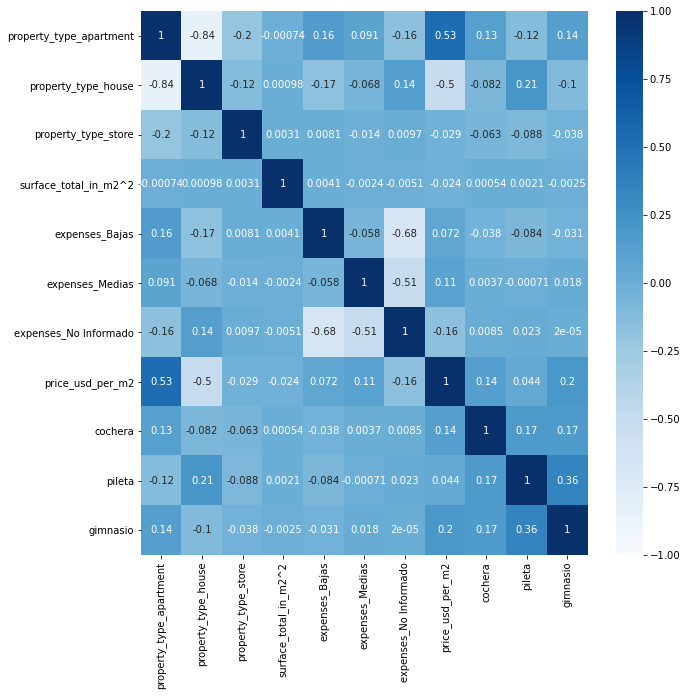

In [91]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(datafinal.loc[:,['property_type_apartment', 'property_type_house', 'property_type_store','surface_total_in_m2^2','expenses_Bajas', 'expenses_Medias', 'expenses_No Informado', 'price_usd_per_m2', 'cochera', 'pileta','gimnasio']].corr(), annot=True, vmin=-1, cmap='Blues');

Aplico modelo de regresion multiple

In [50]:
lm = linear_model.LinearRegression()

X = datafinal.drop('price_usd_per_m2',axis=1)
y = datafinal.price_usd_per_m2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

model_1 = lm.fit(X_train, y_train)
print('Score model_1:', model_1.score(X_test, y_test))

Score model_1: -1.9394712518189507


Score model_1: 0.5649264950908686

Aplico modelo de Ridge (MODELO GANADOR)

In [51]:
# Ahora entrenamos el modelo con todas las variables con Ridge:

lm_ridge = linear_model.RidgeCV(alphas=[0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01,\
                                        0.05, 0.1, 1, 5, 10],\
                                        normalize=True, cv=3) 
# Definimos el rango de de búsqueda del hiperparametro explicitamente

model_2 = lm_ridge.fit(X_train, y_train)

print('Score model_2:', model_2.score(X_test, y_test))

# ¿Mejoraron los resultados?

Score model_2: 0.5739662548855182


Score model_2: 0.5739662548855182

In [52]:
lm_ridge.alpha_

1e-05

Aplico modelo de Lazo

In [53]:
# Ahora entrenamos el modelo con todas las variables con Lasso:

lm_lasso = linear_model.LassoCV(alphas=[0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01,\
                                        0.05, 0.1, 1, 5, 10, 15, 25],\
                                        normalize=True, cv=3)

model_3 = lm_lasso.fit(X_train, y_train)

print('Score model_3:', model_3.score(X_test, y_test))


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 794155682.5881157, tolerance: 2872512.223137463
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1740566383.7742577, tolerance: 2872512.223137463
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4984993668.9177265, tolerance: 2872512.223137463
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: 

Score model_3: 0.5729433453756814


In [54]:
lm_lasso.alpha_

0.005

Pruebo modelo con random sample de 100 registros

In [55]:
data_final_muestreo = datafinal.sample(100,random_state = 1)

In [56]:
X = data_final_muestreo.drop('price_usd_per_m2',axis=1)
y = data_final_muestreo.price_usd_per_m2

print('Score Sample:', model_2.score(X, y))
predictions = model_2.predict(X)

Score Sample: 0.7086975860356693


In [57]:
valor_real = np.round(np.array(y),2)
resultado_pred = np.round(np.array(predictions),2)

valores = zip(valor_real,resultado_pred)

In [58]:
data_inversion = pd.DataFrame(valores,columns = ["Valor real (USD$)","Valor predicho (USD$)"])

In [59]:
data_inversion["Variacion (USD$)"] = data_inversion["Valor real (USD$)"]-data_inversion["Valor predicho (USD$)"]
data_inversion["Tipo"] = data_inversion["Variacion (USD$)"].apply(lambda x:"Sub-valuado" if x < 0 else "Sobre-valuado")

Miro valor real, valor predicho, y si esta sobre o sub valuado

In [60]:
print(data_inversion["Tipo"].value_counts(),'\n')
data_inversion

Sub-valuado      56
Sobre-valuado    44
Name: Tipo, dtype: int64 



,Valor real (USD$),Valor predicho (USD$),Variacion (USD$),Tipo
0,3632,2839.22,792.78,Sobre-valuado
1,2556,1794.05,761.95,Sobre-valuado
2,2643,2869.66,-226.66,Sub-valuado
3,1694,1879.25,-185.25,Sub-valuado
4,3010,2802.16,207.84,Sobre-valuado
...,...,...,...,...
95,1405,1791.25,-386.25,Sub-valuado
96,1500,1090.51,409.49,Sobre-valuado
97,1331,1555.71,-224.71,Sub-valuado
98,683,940.09,-257.09,Sub-valuado


Muestro las 10 propiedades con mayor sub-valuacion de la muestra aleatoria

In [61]:
data_inversion.sort_values(by="Variacion (USD$)").head(10)

,Valor real (USD$),Valor predicho (USD$),Variacion (USD$),Tipo
89,559,1698.69,-1139.69,Sub-valuado
39,1260,2151.47,-891.47,Sub-valuado
17,2064,2907.04,-843.04,Sub-valuado
70,1686,2510.62,-824.62,Sub-valuado
99,161,965.55,-804.55,Sub-valuado
73,1111,1773.73,-662.73,Sub-valuado
15,619,1265.73,-646.73,Sub-valuado
76,1900,2487.48,-587.48,Sub-valuado
6,900,1476.65,-576.65,Sub-valuado
33,544,1112.54,-568.54,Sub-valuado
